# DSC540 - Final Project Milestone5
### Merging the Data and Storing in a Database/Visualizing Data

#### Shanthibooshan Subramanian 

### Project Milestone 2 - Perform data transformation and Cleaning/Formatting Flat File Source

In [167]:
#Load the Necessary Libraries

import requests as r
import pandas as pd
import xlrd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt


In [168]:
# Load the FraudTest.csv file

fraud_data_csv = pd.read_csv('fraudTest.csv', sep=",")
fraud_data_csv.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [169]:
# Transformation 1: Check for missing values in any of the columns that will be kept in the final data set.

for c in fraud_data_csv.columns:
    miss = fraud_data_csv[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s).".format(c,miss))
    else:
        print("{} has no missing values.".format(c))

Unnamed: 0 has no missing values.
trans_date_trans_time has 16 missing value(s).
cc_num has no missing values.
merchant has no missing values.
category has no missing values.
amt has no missing values.
first has no missing values.
last has no missing values.
gender has no missing values.
street has no missing values.
city has no missing values.
state has no missing values.
zip has no missing values.
lat has 14 missing value(s).
long has no missing values.
city_pop has no missing values.
job has no missing values.
dob has no missing values.
trans_num has no missing values.
unix_time has no missing values.
merch_lat has 13 missing value(s).
merch_long has no missing values.
is_fraud has no missing values.


In [170]:
# Transformation 2. Delete the 'trans_num' column.

del fraud_data_csv['trans_num']
fraud_data_csv.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,1371816917,44.959148,-85.884734,0


In [171]:
# Transformation 3. Delete the 'merch_lat ' column.

del fraud_data_csv['merch_lat']
fraud_data_csv.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,state,zip,lat,long,city_pop,job,dob,unix_time,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,1371816865,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,1371816873,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,1371816893,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,1371816915,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,1371816917,-85.884734,0


In [172]:
# Transformation 4. Delete the 'merch_long' column.

del fraud_data_csv['merch_long']
fraud_data_csv.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,1371816865,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,1371816873,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,1371816893,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,1371816915,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,1371816917,0


In [173]:
# Transformation 5.Convert time to a readable format

fraud_data_csv['unix_time'] = pd.to_datetime(fraud_data_csv['unix_time'], unit='s')
fraud_data_csv.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2013-06-21 12:14:25,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,2013-06-21 12:14:33,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,2013-06-21 12:14:53,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,2013-06-21 12:15:15,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,2013-06-21 12:15:17,0


In [174]:
# Transformation 6. Add a column heading of 'row_id' to the first column.

fraud_data_csv.rename(columns = {'Unnamed: 0' : 'row_id'}, inplace=True)
fraud_data_csv.head()

,row_id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2013-06-21 12:14:25,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,2013-06-21 12:14:33,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,2013-06-21 12:14:53,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,2013-06-21 12:15:15,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,2013-06-21 12:15:17,0


In [175]:
# Transformation 7. Convert amount to a float with two decimal places

fraud_data_csv['amt'] = fraud_data_csv['amt'].round(2)
fraud_data_csv.head()

,row_id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2013-06-21 12:14:25,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,2013-06-21 12:14:33,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,2013-06-21 12:14:53,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,2013-06-21 12:15:15,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,2013-06-21 12:15:17,0


In [176]:
# Transformation 9. Identify any missing values

missing_values = fraud_data_csv.isnull().sum().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 30


In [177]:
# Transformation 11. drop the duplicates
fraud_data_csv = fraud_data_csv.drop_duplicates()
fraud_data_csv.head()

,row_id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2013-06-21 12:14:25,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,2013-06-21 12:14:33,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,2013-06-21 12:14:53,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,2013-06-21 12:15:15,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,2013-06-21 12:15:17,0


In [178]:
# # Transformation 12. Verify data accuracy and Check  for negative 'amount' values

negative_amounts = fraud_data_csv[fraud_data_csv['amt'] < 0]
if not negative_amounts.empty:
    # Replace negative values with NaN
    fraud_data_csv.loc[fraud_data_csv['amt'] < 0, 'amt'] = np.nan
    print("Negative amounts found and replaced with NaN.")
else:
    print("No negative amounts found.")

No negative amounts found.


In [179]:
# After all Transformation and the final Fraud data

fraud_data_csv

,row_id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2013-06-21 12:14:25,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,2013-06-21 12:14:33,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,2013-06-21 12:14:53,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,2013-06-21 12:15:15,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,2013-06-21 12:15:17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555730,555714,NaN,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,NaN,-91.8912,519,Town planner,2/13/1966,2013-12-31 23:59:07,0
555731,555715,NaN,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,NaN,-95.4401,28739,Futures trader,12/27/1999,2013-12-31 23:59:09,0
555732,555716,NaN,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,NaN,-118.9017,3684,Musician,11/29/1981,2013-12-31 23:59:15,0
555733,555717,NaN,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,NaN,-116.4493,129,Cartographer,12/15/1965,2013-12-31 23:59:24,0


### Project Milestone 3 - Perform data transformation and Cleaning/Formatting Website Source

In [180]:
#Load the required libraries

import pandas as pd
import numpy as np
import xlrd
from bs4 import BeautifulSoup
import numpy as np
import datapackage
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
# To access the Credit card web data source

data_url = 'https://datahub.io/machine-learning/creditcard/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

In [182]:
# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        fraud_data_web = pd.read_csv(resource.descriptor['path'])
        #print (fraud_data_web)

In [183]:
# Transformation 1: Replace headers

# Step #1: Replace headers
headers = ["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount", "Class"]
fraud_data_web.columns = headers
print(fraud_data_web.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [184]:
#Transformation 2: Convert time to a readable format

fraud_data_web["Time"] = pd.to_datetime(fraud_data_web["Time"], unit="s")
fraud_data_web.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [185]:
#Transformation 3: Convert amount to a float with two decimal places

fraud_data_web['Amount'] = np.round(fraud_data_web['Amount'], 2)
fraud_data_web.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [186]:
# Transformation 4. Identify any duplicate rows

fraud_data_web_duplicates = fraud_data_web[fraud_data_web.duplicated(subset=fraud_data_web.columns[:-1], keep=False)]
print(fraud_data_web_duplicates)

                      Time        V1        V2        V3        V4        V5  \
32     1970-01-01 00:00:26 -0.529912  0.873892  1.347247  0.145457  0.414209   
33     1970-01-01 00:00:26 -0.529912  0.873892  1.347247  0.145457  0.414209   
34     1970-01-01 00:00:26 -0.535388  0.865268  1.351076  0.147575  0.433680   
35     1970-01-01 00:00:26 -0.535388  0.865268  1.351076  0.147575  0.433680   
112    1970-01-01 00:01:14  1.038370  0.127486  0.184456  1.109950  0.441699   
...                    ...       ...       ...       ...       ...       ...   
283485 1970-01-02 23:40:27 -1.457978  1.378203  0.811515 -0.603760 -0.711883   
284190 1970-01-02 23:50:33 -2.667936  3.160505 -3.355984  1.007845 -0.377397   
284191 1970-01-02 23:50:33 -2.667936  3.160505 -3.355984  1.007845 -0.377397   
284192 1970-01-02 23:50:33 -2.691642  3.123168 -3.339407  1.017018 -0.293095   
284193 1970-01-02 23:50:33 -2.691642  3.123168 -3.339407  1.017018 -0.293095   

              V6        V7        V8   

In [187]:
#Transformation 3: Convert amount to a float with two decimal places

fraud_data_web['Amount'] = np.round(fraud_data_web['Amount'], 2)
fraud_data_web.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [188]:
# Transformation 5. drops all the duplicate rows in the dataset
fraud_data_web = fraud_data_web.drop_duplicates()
fraud_data_web.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [189]:
# Transformation 6: Fix casing or inconsistent values

# Convert all values in the "Class" column to lowercase
fraud_data_web['Class'] = fraud_data_web['Class'].str.lower()

# Check the unique values in the "Class" column after fixing casing
print(fraud_data_web['Class'].unique())
fraud_data_web.head()

["'0'" "'1'"]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [190]:
### Project Milestone - 4 - Perform data transformation and/or cleansing steps to your API data

In [191]:
## Import the required libraries

import pandas as pd
import json
import requests
import random
from concurrent import futures


In [192]:
# Importing the FraudValidation class from the fraudlabspro.fraudvalidation module
#API : https://www.fraudlabspro.com/developer/api/screen-order?ref=apilist.fun

from fraudlabspro.fraudvalidation import FraudValidation

In [193]:
# Configure your API key
api_key = 'W7HNWZ1PGIEX6DPG1LIP8ATLEU2DB3BL'

# Set up the fraud validation object
fraud_validation = FraudValidation(api_key)
# Set up an empty list to store the results
results_list = []
fraud_data_api = pd.read_csv('fraud_results1.csv', sep=",")
fraud_data_api.head()

,is_country_match,is_high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,ip_longitude,...,card_subtype,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,NaN,N,-,-,CA,North America,Quebec,Montreal,45.5460,-73.6252,...,NaN,100,0,APPROVE,20230521-SUAGLS,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
1,NaN,N,-,-,CH,Europe,Zurich,Zurich,47.3668,8.5498,...,NaN,100,0,APPROVE,20230521-VZALEO,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
2,NaN,N,-,-,BR,South America,Santa Catarina,Balneario Camboriu,-26.9907,-48.6346,...,NaN,100,0,APPROVE,20230521-BSFT4Z,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
3,NaN,N,-,-,US,North America,California,Cupertino,37.3166,-122.0465,...,NaN,100,0,APPROVE,20230521-HYWZZZ,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
4,NaN,N,-,-,US,North America,Florida,Miami,25.7743,-80.1936,...,NaN,100,0,APPROVE,20230521-V8KLML,1.5.1,208,INVALID QUANTITY VALUE,500,NaN


In [194]:
#Data Transformation : 1 Replace Headers

# Replace Headers
new_headers = ['country_match', 'high_risk_country', 'distance_in_km', 'distance_in_mile',
               'ip_country', 'ip_continent', 'ip_region', 'ip_city', 'ip_latitude', 'ip_longitude',
               'ip_timezone', 'ip_elevation', 'ip_domain', 'ip_mobile_mnc', 'ip_mobile_mcc',
               'ip_mobile_brand', 'ip_netspeed', 'ip_isp_name', 'ip_usage_type', 'free_email',
               'new_domain_name', 'domain_exists', 'proxy_ip_address', 'bin_found',
               'bin_country_match', 'bin_name_match', 'bin_phone_match',
               'bin_phone_country_match', 'bin_prepaid', 'address_ship_forward',
               'bill_ship_city_match', 'bill_ship_state_match', 'bill_ship_country_match',
               'is_bill_ship_postal_match', 'is_ship_address_blacklist', 'is_phone_blacklist',
               'ip_blacklist', 'email_blacklist', 'credit_card_blacklist',
               'device_blacklist', 'user_blacklist', 'high_risk_username',
               'export_controlled_country', 'malware_exploit', 'user_order_id', 'user_order_memo',
               'card_subtype', 'fraudlabspro_score', 'fraudlabspro_distribution', 'fraudlabspro_status',
               'fraudlabspro_id', 'fraudlabspro_version', 'fraudlabspro_error_code', 'fraudlabspro_message',
               'fraudlabspro_credits', 'device_id']

fraud_data_api.columns = new_headers
fraud_data_api.head()

,country_match,high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,ip_longitude,...,card_subtype,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,NaN,N,-,-,CA,North America,Quebec,Montreal,45.5460,-73.6252,...,NaN,100,0,APPROVE,20230521-SUAGLS,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
1,NaN,N,-,-,CH,Europe,Zurich,Zurich,47.3668,8.5498,...,NaN,100,0,APPROVE,20230521-VZALEO,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
2,NaN,N,-,-,BR,South America,Santa Catarina,Balneario Camboriu,-26.9907,-48.6346,...,NaN,100,0,APPROVE,20230521-BSFT4Z,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
3,NaN,N,-,-,US,North America,California,Cupertino,37.3166,-122.0465,...,NaN,100,0,APPROVE,20230521-HYWZZZ,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
4,NaN,N,-,-,US,North America,Florida,Miami,25.7743,-80.1936,...,NaN,100,0,APPROVE,20230521-V8KLML,1.5.1,208,INVALID QUANTITY VALUE,500,NaN


In [195]:
#Data Transformation : 2 # Format data into a more readable format

# Format data into a more readable format
fraud_data_api['distance_in_km'] = fraud_data_api['distance_in_km'].replace('-', 0).astype(float)
fraud_data_api['distance_in_mile'] = fraud_data_api['distance_in_mile'].replace('-', 0).astype(float)
fraud_data_api['ip_latitude'] = fraud_data_api['ip_latitude'].round(6)
fraud_data_api['ip_longitude'] = fraud_data_api['ip_longitude'].round(6)
fraud_data_api['fraudlabspro_score'] = fraud_data_api['fraudlabspro_score'].astype(float)

fraud_data_api.head()

,country_match,high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,ip_longitude,...,card_subtype,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,NaN,N,0.0,0.0,CA,North America,Quebec,Montreal,45.5460,-73.6252,...,NaN,100.0,0,APPROVE,20230521-SUAGLS,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
1,NaN,N,0.0,0.0,CH,Europe,Zurich,Zurich,47.3668,8.5498,...,NaN,100.0,0,APPROVE,20230521-VZALEO,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
2,NaN,N,0.0,0.0,BR,South America,Santa Catarina,Balneario Camboriu,-26.9907,-48.6346,...,NaN,100.0,0,APPROVE,20230521-BSFT4Z,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
3,NaN,N,0.0,0.0,US,North America,California,Cupertino,37.3166,-122.0465,...,NaN,100.0,0,APPROVE,20230521-HYWZZZ,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
4,NaN,N,0.0,0.0,US,North America,Florida,Miami,25.7743,-80.1936,...,NaN,100.0,0,APPROVE,20230521-V8KLML,1.5.1,208,INVALID QUANTITY VALUE,500,NaN


In [196]:
#Data Transformation : 3 # Find duplicates
duplicates = fraud_data_api.duplicated()
fraud_data_api = fraud_data_api[~duplicates]

fraud_data_api.head()

#Data Transformatio : 4 # Remove duplicate rows
fraud_data_api.drop_duplicates(inplace=True)
fraud_data_api.head()

,country_match,high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,ip_longitude,...,card_subtype,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,NaN,N,0.0,0.0,CA,North America,Quebec,Montreal,45.5460,-73.6252,...,NaN,100.0,0,APPROVE,20230521-SUAGLS,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
1,NaN,N,0.0,0.0,CH,Europe,Zurich,Zurich,47.3668,8.5498,...,NaN,100.0,0,APPROVE,20230521-VZALEO,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
2,NaN,N,0.0,0.0,BR,South America,Santa Catarina,Balneario Camboriu,-26.9907,-48.6346,...,NaN,100.0,0,APPROVE,20230521-BSFT4Z,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
3,NaN,N,0.0,0.0,US,North America,California,Cupertino,37.3166,-122.0465,...,NaN,100.0,0,APPROVE,20230521-HYWZZZ,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
4,NaN,N,0.0,0.0,US,North America,Florida,Miami,25.7743,-80.1936,...,NaN,100.0,0,APPROVE,20230521-V8KLML,1.5.1,208,INVALID QUANTITY VALUE,500,NaN


In [197]:
#Data Transformation : 5 # Replace missing values in specific columns

fraud_data_api['country_match'].fillna('Unknown', inplace=True)
fraud_data_api['ip_country'].fillna('Unknown', inplace=True)
fraud_data_api.head()

,country_match,high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,ip_longitude,...,card_subtype,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,Unknown,N,0.0,0.0,CA,North America,Quebec,Montreal,45.5460,-73.6252,...,NaN,100.0,0,APPROVE,20230521-SUAGLS,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
1,Unknown,N,0.0,0.0,CH,Europe,Zurich,Zurich,47.3668,8.5498,...,NaN,100.0,0,APPROVE,20230521-VZALEO,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
2,Unknown,N,0.0,0.0,BR,South America,Santa Catarina,Balneario Camboriu,-26.9907,-48.6346,...,NaN,100.0,0,APPROVE,20230521-BSFT4Z,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
3,Unknown,N,0.0,0.0,US,North America,California,Cupertino,37.3166,-122.0465,...,NaN,100.0,0,APPROVE,20230521-HYWZZZ,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
4,Unknown,N,0.0,0.0,US,North America,Florida,Miami,25.7743,-80.1936,...,NaN,100.0,0,APPROVE,20230521-V8KLML,1.5.1,208,INVALID QUANTITY VALUE,500,NaN


In [198]:
#Data Transformation : 6 # Drop rows with missing or empty values in ip_country, ip_region, and ip_city columns
fraud_data_api.dropna(subset=['ip_country', 'ip_region', 'ip_city'], inplace=True)
fraud_data_api.head()

#Data Transformatio : 6 # Drop rows with '-' values in ip_country, ip_region, and ip_city columns
fraud_data_api = fraud_data_api[(fraud_data_api['ip_country'] != '-') & (fraud_data_api['ip_region'] != '-') & (fraud_data_api['ip_city'] != '-')]
fraud_data_api.head()

,country_match,high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,ip_longitude,...,card_subtype,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,Unknown,N,0.0,0.0,CA,North America,Quebec,Montreal,45.5460,-73.6252,...,NaN,100.0,0,APPROVE,20230521-SUAGLS,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
1,Unknown,N,0.0,0.0,CH,Europe,Zurich,Zurich,47.3668,8.5498,...,NaN,100.0,0,APPROVE,20230521-VZALEO,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
2,Unknown,N,0.0,0.0,BR,South America,Santa Catarina,Balneario Camboriu,-26.9907,-48.6346,...,NaN,100.0,0,APPROVE,20230521-BSFT4Z,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
3,Unknown,N,0.0,0.0,US,North America,California,Cupertino,37.3166,-122.0465,...,NaN,100.0,0,APPROVE,20230521-HYWZZZ,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
4,Unknown,N,0.0,0.0,US,North America,Florida,Miami,25.7743,-80.1936,...,NaN,100.0,0,APPROVE,20230521-V8KLML,1.5.1,208,INVALID QUANTITY VALUE,500,NaN


In [199]:
#Data Transformatio : 7 # Fix casing or inconsistent values
fraud_data_api['ip_country'] = fraud_data_api['ip_country'].str.upper()
fraud_data_api.head()

,country_match,high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,ip_longitude,...,card_subtype,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,Unknown,N,0.0,0.0,CA,North America,Quebec,Montreal,45.5460,-73.6252,...,NaN,100.0,0,APPROVE,20230521-SUAGLS,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
1,Unknown,N,0.0,0.0,CH,Europe,Zurich,Zurich,47.3668,8.5498,...,NaN,100.0,0,APPROVE,20230521-VZALEO,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
2,Unknown,N,0.0,0.0,BR,South America,Santa Catarina,Balneario Camboriu,-26.9907,-48.6346,...,NaN,100.0,0,APPROVE,20230521-BSFT4Z,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
3,Unknown,N,0.0,0.0,US,North America,California,Cupertino,37.3166,-122.0465,...,NaN,100.0,0,APPROVE,20230521-HYWZZZ,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
4,Unknown,N,0.0,0.0,US,North America,Florida,Miami,25.7743,-80.1936,...,NaN,100.0,0,APPROVE,20230521-V8KLML,1.5.1,208,INVALID QUANTITY VALUE,500,NaN


In [200]:
#Data Transformatio : 8 # Reset the index after dropping rows

fraud_data_api.reset_index(drop=True, inplace=True)
fraud_data_api.rename(columns={'index': 'Index_ID'}, inplace=True)
fraud_data_api.head()

,country_match,high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,ip_longitude,...,card_subtype,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,Unknown,N,0.0,0.0,CA,North America,Quebec,Montreal,45.5460,-73.6252,...,NaN,100.0,0,APPROVE,20230521-SUAGLS,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
1,Unknown,N,0.0,0.0,CH,Europe,Zurich,Zurich,47.3668,8.5498,...,NaN,100.0,0,APPROVE,20230521-VZALEO,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
2,Unknown,N,0.0,0.0,BR,South America,Santa Catarina,Balneario Camboriu,-26.9907,-48.6346,...,NaN,100.0,0,APPROVE,20230521-BSFT4Z,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
3,Unknown,N,0.0,0.0,US,North America,California,Cupertino,37.3166,-122.0465,...,NaN,100.0,0,APPROVE,20230521-HYWZZZ,1.5.1,208,INVALID QUANTITY VALUE,500,NaN
4,Unknown,N,0.0,0.0,US,North America,Florida,Miami,25.7743,-80.1936,...,NaN,100.0,0,APPROVE,20230521-V8KLML,1.5.1,208,INVALID QUANTITY VALUE,500,NaN


# Project Milestone - 5 - Merging the Data and Storing in a Database/Visualizing Data

In [201]:
import sqlite3 as sql

In [202]:
conn = sql.connect("frauddata2.db")

In [203]:
c = conn.cursor()
#  function to make sure the connection is successful
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[]


In [204]:
#Inserting the flat file data frame into SQLite

fraud_data_csv.to_sql('fraud_data_csv', conn)

555735

In [205]:
#Inserting the Web data frame into SQLite

fraud_data_web.to_sql('fraud_data_web', conn)

283726

In [206]:
#Inserting the Web data frame into SQLite

fraud_data_api.to_sql('fraud_data_api', conn)

43828

In [207]:
# Read the data for the fraud data csv

sql0_fraud_data_csv = pd.read_sql("""Select * from fraud_data_csv""",conn)
sql0_fraud_data_csv.head()

,index,row_id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,city,state,zip,lat,long,city_pop,job,dob,unix_time,is_fraud
0,0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2013-06-21 12:14:25,0
1,1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,2013-06-21 12:14:33,0
2,2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,2013-06-21 12:14:53,0
3,3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,2013-06-21 12:15:15,0
4,4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,2013-06-21 12:15:17,0


In [208]:
# Read the data for the fraud data web

sql1_fraud_data_web = pd.read_sql("""Select * from fraud_data_web""",conn)
sql1_fraud_data_web.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [209]:
# Read the data for the fraud data API

sql2_fraud_data_api = pd.read_sql("""Select * from fraud_data_api""",conn)
sql2_fraud_data_api.head()

,index,country_match,high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,...,card_subtype,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,0,Unknown,N,0.0,0.0,CA,North America,Quebec,Montreal,45.5460,...,None,100.0,0,APPROVE,20230521-SUAGLS,1.5.1,208,INVALID QUANTITY VALUE,500,None
1,1,Unknown,N,0.0,0.0,CH,Europe,Zurich,Zurich,47.3668,...,None,100.0,0,APPROVE,20230521-VZALEO,1.5.1,208,INVALID QUANTITY VALUE,500,None
2,2,Unknown,N,0.0,0.0,BR,South America,Santa Catarina,Balneario Camboriu,-26.9907,...,None,100.0,0,APPROVE,20230521-BSFT4Z,1.5.1,208,INVALID QUANTITY VALUE,500,None
3,3,Unknown,N,0.0,0.0,US,North America,California,Cupertino,37.3166,...,None,100.0,0,APPROVE,20230521-HYWZZZ,1.5.1,208,INVALID QUANTITY VALUE,500,None
4,4,Unknown,N,0.0,0.0,US,North America,Florida,Miami,25.7743,...,None,100.0,0,APPROVE,20230521-V8KLML,1.5.1,208,INVALID QUANTITY VALUE,500,None


In [210]:
# Merge the data from both sources based on a common column
merged_fraud_data = pd.concat([fraud_data_csv, fraud_data_web, fraud_data_api], axis=1)


# Create the "merged_fraud_data" table in the database
merged_fraud_data.to_sql('merged_fraud_data', conn, if_exists='replace')

# Read the merged data from the database
sql4_merged_fraud_data = pd.read_sql("SELECT * FROM merged_fraud_data", conn)
sql4_merged_fraud_data.head()



,index,row_id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,card_subtype,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,None,100.0,0.0,APPROVE,20230521-SUAGLS,1.5.1,208.0,INVALID QUANTITY VALUE,500.0,None
1,1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,None,100.0,0.0,APPROVE,20230521-VZALEO,1.5.1,208.0,INVALID QUANTITY VALUE,500.0,None
2,2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,None,100.0,0.0,APPROVE,20230521-BSFT4Z,1.5.1,208.0,INVALID QUANTITY VALUE,500.0,None
3,3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,None,100.0,0.0,APPROVE,20230521-HYWZZZ,1.5.1,208.0,INVALID QUANTITY VALUE,500.0,None
4,4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,None,100.0,0.0,APPROVE,20230521-V8KLML,1.5.1,208.0,INVALID QUANTITY VALUE,500.0,None


In [211]:
# load the necessary libraries
import matplotlib.pyplot as plt

### This bar plot visualizes the total transaction amount for each category. The x-axis represents the categories, while the y-axis represents the total transaction amount. Each bar corresponds to a category, and its height represents the total amount associated with that category. The accompanying labels provide the category names, and the y-axis label denotes the unit of measurement for the total amount.

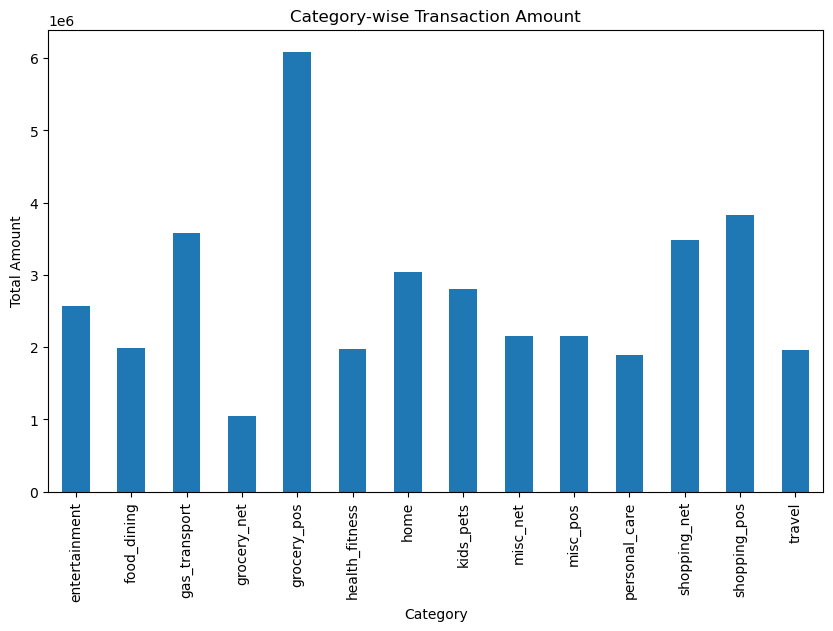

In [212]:
## Visualization 1 
## Bar Plot: Category-wise Transaction Amount

# Group data by category and calculate the total transaction amount
category_amount = merged_fraud_data.groupby('category')['amt'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
category_amount.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.title('Category-wise Transaction Amount')
plt.show()

### This pie chart visualizes the distribution of transactions by gender. Each slice of the pie represents a gender category, and its size corresponds to the proportion of transactions associated with that gender. The accompanying labels display the gender categories, and the percentages represent the relative frequency of each gender category within the dataset.

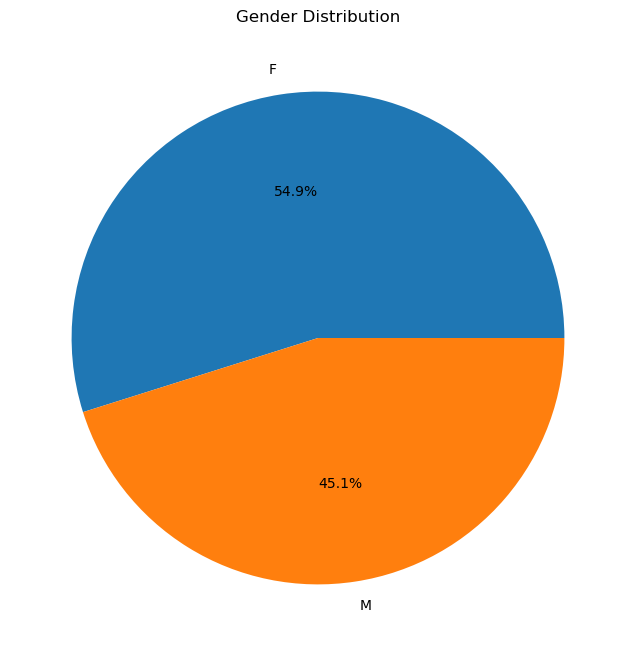

In [213]:
## Visualization 2 
## Pie Chart: Gender Distribution

# Count the number of transactions by gender
gender_counts = merged_fraud_data['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

### This bar plot visualizes the number of transactions for each state. The x-axis represents the states, and the y-axis represents the count of transactions. Each bar represents a state, and its height represents the number of transactions associated with that state.

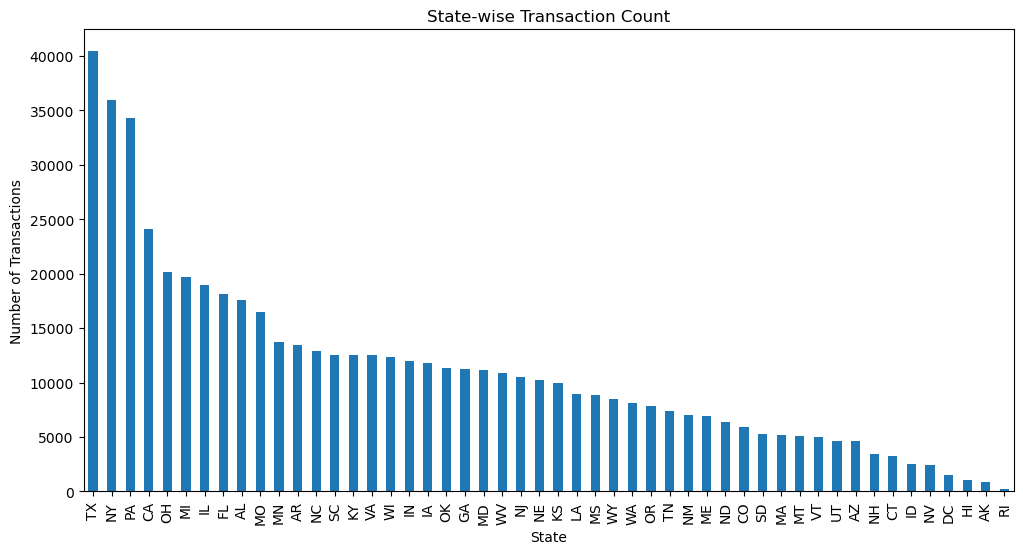

In [214]:
## Visualization 3
## Bar Plot: State-wise Transaction Count

# Count the number of transactions by state
state_counts = merged_fraud_data['state'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.title('State-wise Transaction Count')
plt.show()

### This histogram visualizes the distribution of transaction classes. The x-axis represents the classes, where -1 indicates missing values, 0 represents non-fraud transactions, and 1 represents fraud transactions. The y-axis represents the frequency or count of transactions in each class.

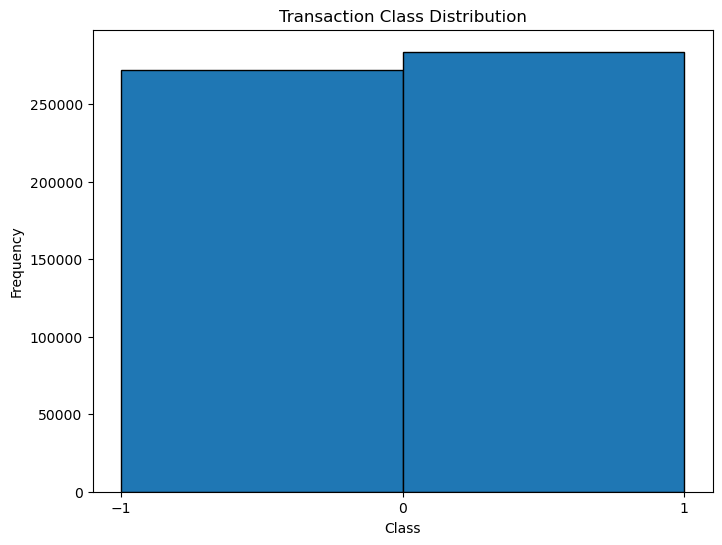

In [215]:
## Visualization 4
## Histogram: Transaction Class Distribution

# Remove the quotes from the 'Class' column
merged_fraud_data['Class'] = merged_fraud_data['Class'].str.replace("'", "")

# Convert the 'Class' column to float type
merged_fraud_data['Class'] = merged_fraud_data['Class'].astype(float)

# Replace missing values with a value that represents them (e.g., -1)
merged_fraud_data['Class'].fillna(-1, inplace=True)

# Convert the 'Class' column to integer type
merged_fraud_data['Class'] = merged_fraud_data['Class'].astype(int)

# Plot the histogram of transaction class
plt.figure(figsize=(8, 6))
plt.hist(merged_fraud_data['Class'], bins=np.arange(-1, 2), edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Transaction Class Distribution')
plt.xticks([-1, 0, 1])
plt.show()

### This scatter plot visualizes the distribution of fraud and non-fraud transactions based on their corresponding amounts. The blue points represent non-fraud transactions, while the red points represent fraud transactions.

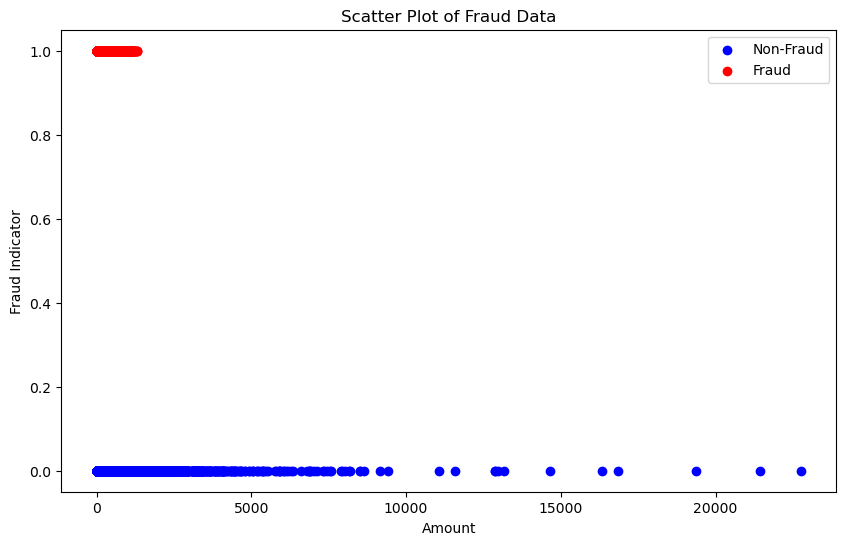

In [216]:
## Visualization 5
## Scatter Plot: Fraud Vs Non Fraud Distribution

# Separate fraud and non-fraud transactions
fraud_transactions = merged_fraud_data[merged_fraud_data['is_fraud'] == 1]
non_fraud_transactions = merged_fraud_data[merged_fraud_data['is_fraud'] == 0]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_fraud_transactions['amt'], non_fraud_transactions['is_fraud'], color='blue', label='Non-Fraud')
plt.scatter(fraud_transactions['amt'], fraud_transactions['is_fraud'], color='red', label='Fraud')

# Add labels and title
plt.xlabel('Amount')
plt.ylabel('Fraud Indicator')
plt.title('Scatter Plot of Fraud Data')

# Add legend
plt.legend()

# Show the plot
plt.show()


### This Visualization refers select the amt column as the x-axis representing the transaction amount and use the 'Fraud' label as the y-axis representing the class of the transaction. We filter the data to include only fraud transactions by using the is_fraud column. The scatter plot will show the distribution of fraud transactions based on their amounts.

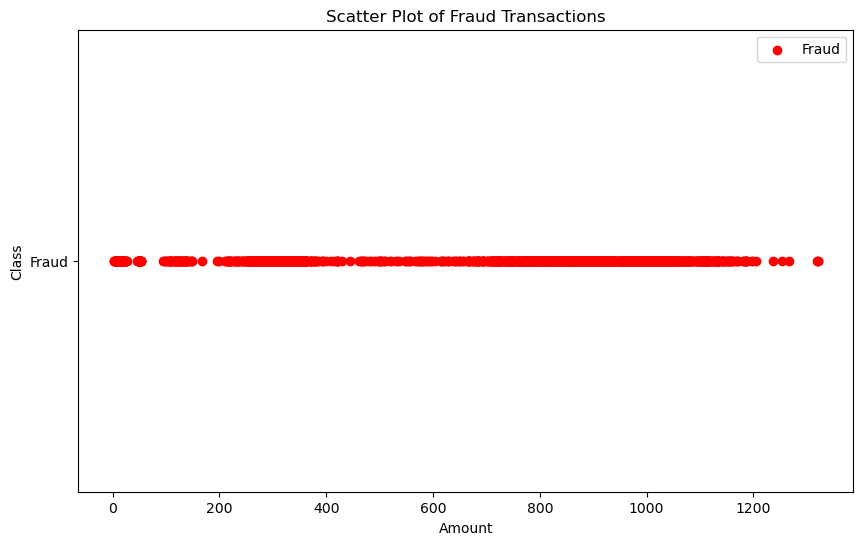

In [217]:
## Visualization 6 - Multiple Data Sources

## Read the data from the database using a UNION query
fraud_data = pd.read_sql("""
    SELECT amt, 'Fraud' AS class
    FROM fraud_data_csv
    WHERE is_fraud = 1
    UNION
    SELECT Amount, 'Fraud' AS class
    FROM fraud_data_web
    WHERE class = 1
""", conn)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fraud_data['amt'], fraud_data['class'], color='red', label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Scatter Plot of Fraud Transactions')
plt.legend()
plt.show()


### This visualization shows the top cities with the highest transaction counts. It helps identify the cities where the most transactions occur, providing a quick overview of the geographic distribution of transactions in the dataset.

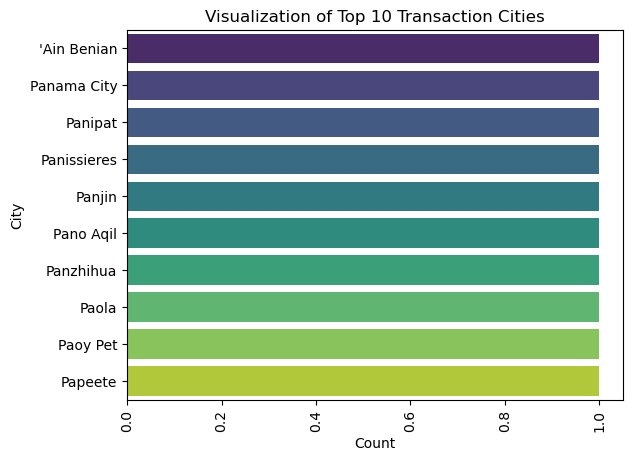

In [218]:
## Visualization 7 - Multiple Data Sources
import seaborn as sns

# Define the number of top cities to show
N = 10  # Example: Show top 10 cities

# Retrieve the data using a UNION query
combined_data = pd.read_sql("""
    SELECT city FROM fraud_data_CSV
    UNION
    SELECT ip_city FROM fraud_data_API
""", conn)

# Get the top N cities with the highest transaction counts
top_cities = combined_data['city'].value_counts().nlargest(N)

# Plot the data for the top cities
sns.countplot(data=combined_data[combined_data['city'].isin(top_cities.index)], y='city', palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Visualization of Top {} Transaction Cities'.format(N))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()



